<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score, log_loss, cohen_kappa_score, roc_curve, roc_auc_score, precision_recall_fscore_support

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Load the csv file

In [3]:
df = pd.read_csv('Heart_disease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Pre-Processing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [6]:
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['education'] = df['education'].astype('int64')

df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0], inplace=True)
df['cigsPerDay'] = df['cigsPerDay'].astype('int64')

df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['BPMeds'] = df['BPMeds'].astype('int64')

df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['totChol'] = df['totChol'].astype('int64')

df['BMI'].fillna(df['BMI'].median(), inplace=True)

df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['heartRate'] = df['heartRate'].astype('int64')

df['glucose'].fillna(81, inplace=True)
df['glucose'] = df['glucose'].astype('int64')

In [7]:
cat_col = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for i in cat_col:
    df[i] = df[i].astype('category')

In [8]:
df.dtypes

male               category
age                   int64
education          category
currentSmoker      category
cigsPerDay            int64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol               int64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate             int64
glucose               int64
CVD                   int64
dtype: object

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df['CVD'].value_counts(normalize=True)*100

CVD
0    84.811321
1    15.188679
Name: proportion, dtype: float64

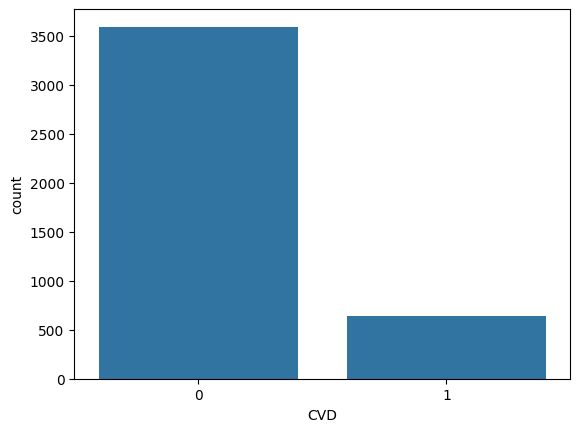

In [10]:
sns.countplot(df, x='CVD')
plt.show()

#### 1's are under represented.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [12]:
X = sm.add_constant(df[['BPMeds', 'sysBP', 'diaBP']])
y = df[['CVD']]

LR = sm.Logit(y, X).fit()
print(LR.summary())

Optimization terminated successfully.
         Current function value: 0.404139
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            3
Date:                Tue, 13 Feb 2024   Pseudo R-squ.:                 0.05125
Time:                        19:08:48   Log-Likelihood:                -1713.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.935e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5986      0.305    -15.068      0.000      -5.197      -4.000
BPMeds         0.3199      0.

In [13]:
LR.aic

3435.0950220932496

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
X = pd.get_dummies(df[cat_col], drop_first=True).astype('int')
X = sm.add_constant(X)
y = df[['CVD']]

LR = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.400771
         Iterations 6


In [15]:
pd.DataFrame({'Features':LR.params.index, 'Odds':np.exp(LR.params.values)})

,Features,Odds
0,const,0.105827
1,male_1,1.590985
2,education_2,0.639709
3,education_3,0.750057
4,education_4,0.790348
5,currentSmoker_1,1.188435
6,BPMeds_1,1.641682
7,prevalentStroke_1,2.818108
8,prevalentHyp_1,2.436160
9,diabetes_1,2.734646


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
X = sm.add_constant(df[['prevalentHyp']])
y = df[['CVD']]

LR = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.411192
         Iterations 6


In [17]:
pd.DataFrame(np.exp(LR.params),columns=['Odds'])

,Odds
const,0.122504
prevalentHyp,2.674373


Each odds ratio represents the change in odds of the outcome (CVD) associated with a one-unit increase in the corresponding predictor variable (prevalentHyp), holding all other variables constant.

For example, if the odds ratio for prevalentHyp is 1.5, it means that for every one-unit increase in prevalentHyp, the odds of having CVD are 1.5 times higher, assuming all other variables remain constant. If the odds ratio is less than 1, it indicates a decrease in the odds of the outcome.

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
X = sm.add_constant(pd.get_dummies(df, columns=['education'], drop_first=True, dtype='int64').drop('CVD', axis=1))
y = df[['CVD']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.376764
         Iterations 7


In [19]:
# Calculate McFadden's R-squared
LL_model = LR.llf  # Log-Likelihood of the model
LL_null = LR.llnull  # Log-Likelihood of the null model
McFadden_R2 = 1 - (LL_model / LL_null)

print("McFadden's R-squared:", McFadden_R2)

McFadden's R-squared: 0.1133367506461801


In [20]:
# Creating a Null Model (Constant Model)
#null_model = DummyClassifier(strategy='constant', constant=1)
#null_model.fit(X_train, y_train)

In [21]:
'''
y_pred_proba = model.predict_log_proba(X_test)
LL_model = -log_loss(y_test, y_pred_proba, normalize=False)  # negative log-loss is log-likelihood

# Compute log-likelihood for the null model
y_pred_proba_null = null_model.predict_log_proba(X_test)
LL_null = -log_loss(y_test, y_pred_proba_null, normalize=False)  # negative log-loss is log-likelihood

# Calculate McFadden's R^2
McFadden_R2 = 1 - (LL_model / LL_null)
print("McFadden's R^2 Score:", McFadden_R2)
'''

'\ny_pred_proba = model.predict_log_proba(X_test)\nLL_model = -log_loss(y_test, y_pred_proba, normalize=False)  # negative log-loss is log-likelihood\n\n# Compute log-likelihood for the null model\ny_pred_proba_null = null_model.predict_log_proba(X_test)\nLL_null = -log_loss(y_test, y_pred_proba_null, normalize=False)  # negative log-loss is log-likelihood\n\n# Calculate McFadden\'s R^2\nMcFadden_R2 = 1 - (LL_model / LL_null)\nprint("McFadden\'s R^2 Score:", McFadden_R2)\n'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
p_values = LR.pvalues
p_values[p_values < 0.05]

const              3.376843e-24
male               1.267037e-02
age                2.627689e-18
cigsPerDay         9.801745e-05
prevalentStroke    1.318069e-02
sysBP              2.974499e-03
glucose            5.460666e-03
dtype: float64

In [23]:
print('Significant Variables =',list(p_values[p_values < 0.05].index))

Significant Variables = ['const', 'male', 'age', 'cigsPerDay', 'prevalentStroke', 'sysBP', 'glucose']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
np.exp(LR.params)

const              0.000308
male               1.355645
age                1.068872
currentSmoker      0.903997
cigsPerDay         1.026999
BPMeds             1.150798
prevalentStroke    3.830915
prevalentHyp       1.292786
diabetes           0.927752
totChol            1.000482
sysBP              1.012623
diaBP              1.003062
BMI                1.005992
heartRate          0.994855
glucose            1.007576
education_2        0.906119
education_3        0.955358
education_4        1.130082
dtype: float64

<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
y_pred = LR.predict(X_test)
y_pred = (y_pred > 0.5).astype('int64')

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
true_positives = conf_matrix[1, 1]
true_negatives = conf_matrix[0, 0]
total_samples = len(y_test)
accuracy = (true_positives + true_negatives) / total_samples

print("Manually Calculated Accuracy:", accuracy)

Manually Calculated Accuracy: 0.8545597484276729


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
y_pred = LR.predict(X_test)
y_pred = (y_pred > 0.18).astype('int64')

In [37]:
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.21223036475800106


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# Performing VIF
while True:
    a = pd.DataFrame()
    a['Features'] = X.columns
    a['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    for i in a.index:
        if a.loc[i]['VIF'] == np.max(a['VIF']) and a.loc[i]['VIF'] > 1.5:
            X.drop(a.loc[i]['Features'], axis=1, inplace=True)
    
    if len(a[a['VIF'] < 1.5]) == len(a):
        break

In [41]:
a

,Features,VIF
0,cigsPerDay,1.309453
1,BPMeds,1.117199
2,prevalentStroke,1.021572
3,prevalentHyp,1.312732
4,diabetes,1.026536
5,education_2,1.224860
6,education_3,1.090166
7,education_4,1.078406


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
X_10 = df[['cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]
y_10 = df[['CVD']]

X_train10, X_test10, y_train10, y_test10 = train_test_split(X_10, y_10, test_size=0.3, random_state=42)

model10 = LogisticRegression()
model10.fit(X_train10, y_train10)

LogisticRegression()

In [44]:
y_pred = pd.Series(model10.predict(X_test10), index=y_test10.index).to_frame(name='CVD')

accuracy = model10.score(X_test10, y_test10)
f1 = f1_score(y_test10, y_pred)
print('Accuracy of the Model =',accuracy)
print('F1 Score =',f1)

Accuracy of the Model = 0.8459119496855346
F1 Score = 0.029702970297029705


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

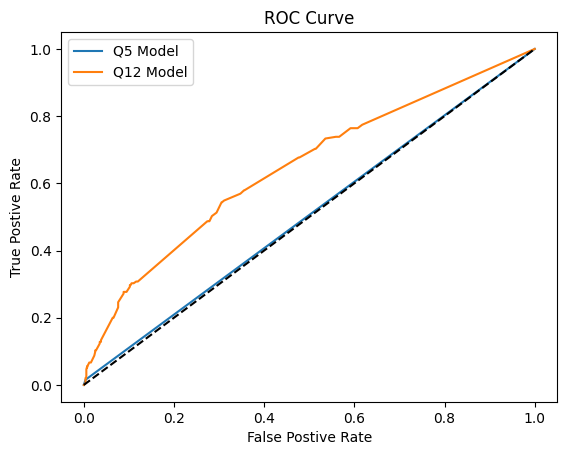

In [45]:
y_pred1 = LR.predict(X_test)
y_pred1 = (y_pred > 0.5).astype('int64')
y_pred2 = model10.predict_proba(X_test10)[:,1]

fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred1)
fpr2, tpr2, threshold2 = roc_curve(y_test10, y_pred2)

# Plotting ROC Curve
plt.plot(fpr1, tpr1, label='Q5 Model')
plt.plot(fpr2, tpr2, label='Q12 Model')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.legend(loc='best')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
X_14 = df[['heartRate']]
y_14 = df[['CVD']]

X_train14, X_test14, y_train14, y_test14 = train_test_split(X_14, y_14, test_size=0.3, random_state=42)

model14 = LogisticRegression()
model14.fit(X_train14, y_train14)

LogisticRegression()

In [47]:
y_pred3 = model14.predict_proba(X_test14)[:,1]
auc = roc_auc_score(y_test14, y_pred3)
print('AUC Score =',auc)

AUC Score = 0.5270861605123444


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
entrophy14 = log_loss(y_test14, y_pred3)
print('Cross Entrophy for Q14 Model =',entrophy14)

Cross Entrophy for Q14 Model = 0.42793765714515614


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

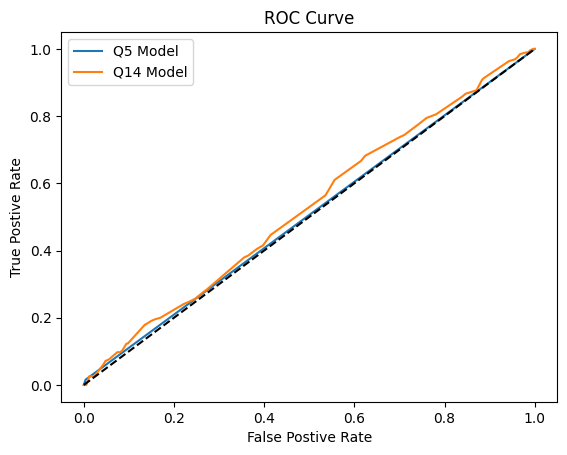

In [49]:
fpr3, tpr3, threshold3 =  roc_curve(y_test, y_pred3)

# Plotting ROC Curve
plt.plot(fpr1, tpr1, label='Q5 Model')
plt.plot(fpr3, tpr3, label='Q14 Model')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.legend(loc='best')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
entrophy5 = log_loss(y_test, y_pred1)
print('Cross Entrophy for Q5 Full Model =',entrophy5)

Cross Entrophy for Q5 Full Model = 5.553896276939436


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
X_18 = df[['currentSmoker', 'cigsPerDay']]
y_18 = df[['CVD']]

X_train18, X_test18, y_train18, y_test18 = train_test_split(X_18, y_18, test_size=0.3, random_state=42)

model18 = LogisticRegression()
model18.fit(X_train18, y_train18)

LogisticRegression()

In [52]:
y_pred = pd.Series(model18.predict(X_test18), index=y_test18.index).to_frame(name='CVD')
conf_matrix = confusion_matrix(y_test18, y_pred)
conf_matrix

array([[1077,    0],
       [ 195,    0]], dtype=int64)

In [53]:
pres = conf_matrix[1,1]/(conf_matrix[0,1] + conf_matrix[1,1])
recall = conf_matrix[1,1]/(conf_matrix[1,0] + conf_matrix[1,1])
f1 = (2*pres*recall)/(pres + recall)
print(pres)
print(recall)
print(f1)
print(f1_score(y_test18, y_pred))

nan
0.0
nan
0.0


In [54]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test18, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here